# Introduction
In this project i will be training a machine learning model on a heart disease dataset to predict if someone has a heart disease or not. There are 11 attributes in the dataset that might help to predict if a patient has a heart disease. With those attributes i am trying to research how accurately can machine learning models use demographic factors, clinical measurements, and symptoms to classify individuals with and without heart disease and identifying high-risk combinations of risk factors?

Every year about 31% of all deaths are cardiovascular disease related. Early detection and management of CVDs are imperative for individuals either afflicted with the condition or at high risk due to factors like hypertension, diabetes, hyperlipidemia, or pre-existing diseases. Timely intervention significantly improves outcomes and reduces mortality rates. This is where machine learning models emerge as invaluable tools.

A little about the dataset that will be used in this project. It is a combination of patients with and without a heart diease from 5 different countries:
* Cleveland: 303 observations
* Hungarian: 294 observations
* Switzerland: 123 observations
* Long Beach VA: 200 observations
* Stalog (Heart) Data Set: 270 observations

That makes a total of 1190 observations but of that 272 observations are duplicated so the final dataset is 918 observations.

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link:
https://archive.ics.uci.edu/dataset/45/heart+disease

Importing packages for python, plots and machine learning models

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


Making a dataframe of the data.

In [3]:
df = pd.read_csv("heart.csv") # reading in the file contents

Printing some lines to see what the format of the data is

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


The data consists of 7 numeral and 5 nominal attributes

To determine the amount of unique values n the dataset.

In [5]:
print(df.nunique()) 

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


To gain insights into the characteristics of each attribute within the dataset

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


conclusion about unique values and info:
- Age, RestingBP, cholesterol, max hr and oldpeak have very high unique numbers so those numbers range alot
- 2/3/4 unique numbers at some attributes aka very low numbers indicating that those attributes are probably categorical this is true for sexes, chest pain, fastingBS, restingECG, exercise angina, st_slope and heart disease
- the non-null count indicates that there are no N.A. in the data

To ascertain the presence of duplicated rows within the dataset

In [7]:
df.duplicated().sum()

0

There are no duplicated rows just like the data was explained in the paper.


### Explanation of the 12 attributes in the dataset:

- **Age**: The age of the participant in years.
  
- **Sex**: The gender of the participant (M: Male, F: Female).
  
- **Chest Pain Type**: Describes the type of chest discomfort experienced by the participant:
    - **Typical Angina (TA)**: Chest pain or discomfort typically associated with heart problems, often triggered by physical exertion or emotional stress.
    - **Atypical Angina (ATA)**: Chest discomfort that doesn't fully meet the criteria for typical angina but still suggests a possible heart-related issue. The symptoms may vary and could include shortness of breath, nausea, or fatigue.
    - **Non-Anginal Pain (NAP)**: Chest discomfort not originating from the heart, which could be due to musculoskeletal issues, respiratory problems, gastrointestinal conditions, or anxiety.
    - **Asymptomatic (ASY)**: The participant does not experience any symptoms related to chest discomfort.

- **Resting Blood Pressure**: The participant's blood pressure measured while at rest, in millimeters of mercury (mm Hg).
  
- **Cholesterol**: The level of cholesterol in the participant's blood serum, measured in milligrams per deciliter (mm/dl).
  
- **Fasting Blood Sugar**: Indicates the participant's fasting blood sugar level:
    - **1**: If fasting blood sugar is greater than 120 mg/dl.
    - **0**: Otherwise.

- **Resting Electrocardiogram Results**: Interpretation of the resting electrocardiogram (ECG) findings:
    - **Normal**: ECG shows no abnormalities.
    - **ST**: ECG shows abnormalities in the ST-T wave, such as T wave inversions or ST elevation/depression of more than 0.05 millivolts (mV).
    - **LVH**: ECG suggests probable or definite left ventricular hypertrophy (enlargement of the heart's left ventricle) according to Estes' criteria.
  
- **Maximum Heart Rate Achieved**: The highest heart rate achieved during physical exertion, measured in beats per minute (bpm).

- **Exercise-Induced Angina**: Indicates whether the participant experienced angina (chest pain or discomfort) during exercise:
    - **Y**: Yes, the participant experienced exercise-induced angina.
    - **N**: No, the participant did not experience exercise-induced angina.
  
- **Oldpeak**: Refers to the ST depression observed during exercise, measured as a numeric value.

- **ST Slope**: Describes the slope of the peak exercise ST segment(segment wave, "ST" refers to a specific portion of the ECG waveform the interval between ventricular depolarization and repolarization) observed on the ECG:
    - **Up**: The ST segment slopes upwards during exercise.
    - **Flat**: The ST segment remains flat during exercise.
    - **Down**: The ST segment slopes downwards during exercise.
  
- **Heart Disease**: Indicates the presence or absence of heart disease:
    - **1**: Heart disease is present.
    - **0**: No heart disease is detected.

A codebook made of the dataset with help from the publications of the data.

In [8]:
codebook={
    "attribute": ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease'],
    "unit": ["year", "n.a.", "n.a.", "mm of Hg", "mm/dl", "n.a.", "n.a.", "bpm", "n.a.", "st depression", "n.a.", "n.a."],
    "dtype": ["int64", "category", "category", "int64", "int64", "catergory", "category", "int64", "category", "float64", "category", "catergory"],
    "description": [
        "The age of the participant", 
        "The gender of the participant", 
        "The type of pain the participant is experiencing", 
        "Recorded blood pressure at rest", 
        "The level of cholesterol in the participant's blood serum", 
        "Indicates the participant's fasting blood sugar level", 
        "Interpretation of the resting electrocardiogram (ECG) findings",
        "Maximum heat rate achieved during physical extraction", 
        "Indicates whether the participant experienced angina during exercise", 
        "ST depression observed during exercise", 
        "The slope of the peak exercise ST segment observed on the ECG", 
        "Indicates the presence or absence of heart disease"
    ]
}
pd.DataFrame(codebook).set_index("attribute")

,unit,dtype,description
attribute,,,
Age,year,int64,The age of the participant
Sex,n.a.,category,The gender of the participant
ChestPainType,n.a.,category,The type of pain the participant is experiencing
RestingBP,mm of Hg,int64,Recorded blood pressure at rest
Cholesterol,mm/dl,int64,The level of cholesterol in the participant's ...
FastingBS,n.a.,catergory,Indicates the participant's fasting blood suga...
RestingECG,n.a.,category,Interpretation of the resting electrocardiogra...
MaxHR,bpm,int64,Maximum heat rate achieved during physical ext...
ExerciseAngina,n.a.,category,Indicates whether the participant experienced ...


The data consists of 5 numeric and 7 categorical attributes. 

Verified that there are 918 rows and 12 attributes in the dataframe.

In [9]:
df.shape

(918, 12)

## EDA univariaat


To provide a description of attributes containing numerical values

In [10]:
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In conclusion, upon examining the dataset, it's evident that certain attributes such as resting blood pressure and cholesterol contain __minimum values of 0__, which are biologically implausible and likely indicative of missing data. This underscores the necessity of __data cleaning and preprocessing steps__ to address such anomalies and ensure the integrity of subsequent analyses.

To enhance clarity in visualizing the data distribution, __two separate boxplots were generated__. One boxplot focuses on __the subset of data with larger numbers, while the other highlights data points around 1__. This segregation enables a more detailed examination of each subset's characteristics and facilitates better insights into their respective distributions.

The initial boxplot illustrates the distributions of variables with lower numerical values, including Oldpeak, FastingBS, and HeartDisease. This segmentation allows for a focused analysis of these attributes' spread and central tendencies, aiding in the identification of potential patterns or outliers within this subset of the data.

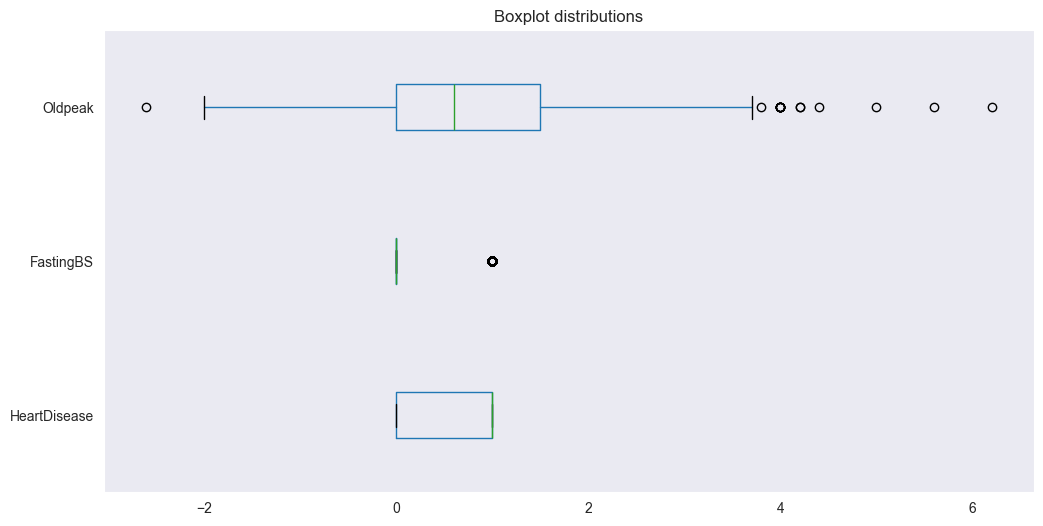

In [11]:
attributes_low = ["HeartDisease", "FastingBS", "Oldpeak"]
filtered_df_low = df[attributes_low]
axs = filtered_df_low.boxplot(grid=False, vert=False, figsize=(12, 6))
axs.set_title("Boxplot distributions")
plt.show()

In conclusion, the analysis of the boxplot reveals distinct characteristics of the variables under consideration. Heartdisease exhibits a relatively normal distribution, suggesting a typical spread of values. Fastingbs predominantly consists of 0 values, with outliers occurring at 1, indicating a potential anomaly in the data. Meanwhile, Oldpeak spans between -2 and approximately 3.7, with outliers extending beyond 3.7 up to 6. These observations provide valuable insights into the distribution patterns and potential outliers within each variable, facilitating further investigation and data refinement processes.

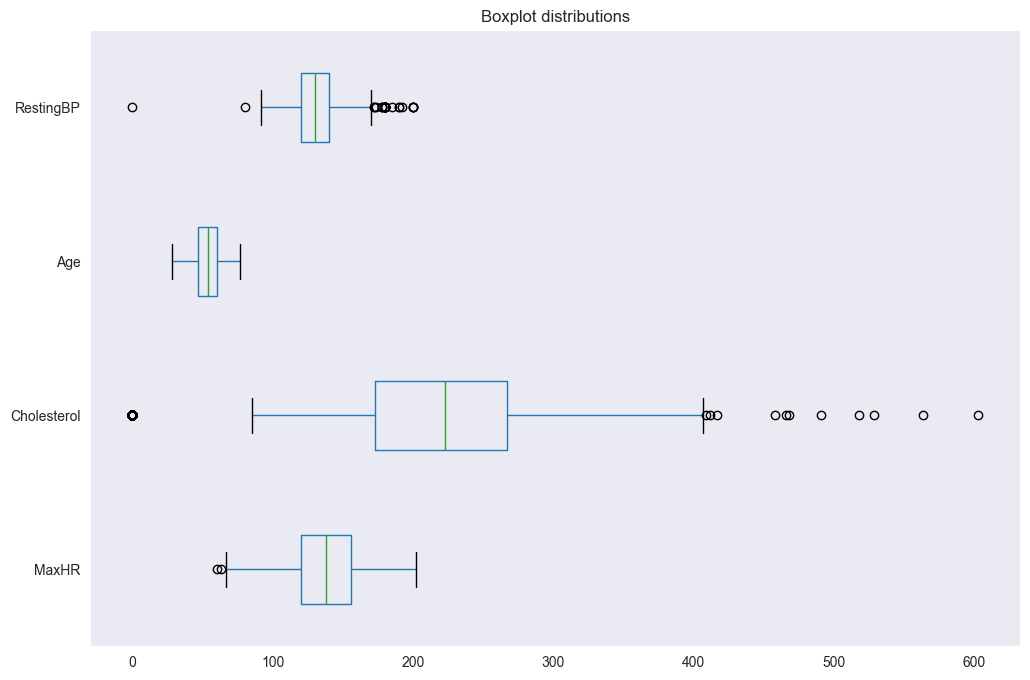

In [12]:
attributes_high = ["MaxHR", "Cholesterol", "Age", "RestingBP"]
filtered_df_high = df[attributes_high]
axs = filtered_df_high.boxplot(grid=False, vert=False, figsize=(12, 8))
axs.set_title("Boxplot distributions")
plt.show()

In conclusion, after investigating outliers in resting blood pressure (RestingBP) and cholesterol levels, it became evident that higher values in these attributes correspond to an increased likelihood of heart disease, corroborating existing medical literature. Similarly, outliers in maximum heart rate (MaxHR) suggest a potential association, with lower rates possibly indicating a higher risk of heart disease. These findings underscore the importance of considering these physiological markers in assessing cardiovascular health and risk factors within the dataset.

To visualize the numeric values of the attributes maxhr, cholesterol, age, restingbp, and oldpeak, histograms can be employed. Histograms provide a graphical representation of the distribution of numerical data, allowing for insights into their central tendencies, spread, and potential outliers. By examining these histograms, we can gain a better understanding of the distribution patterns of each attribute within the dataset.

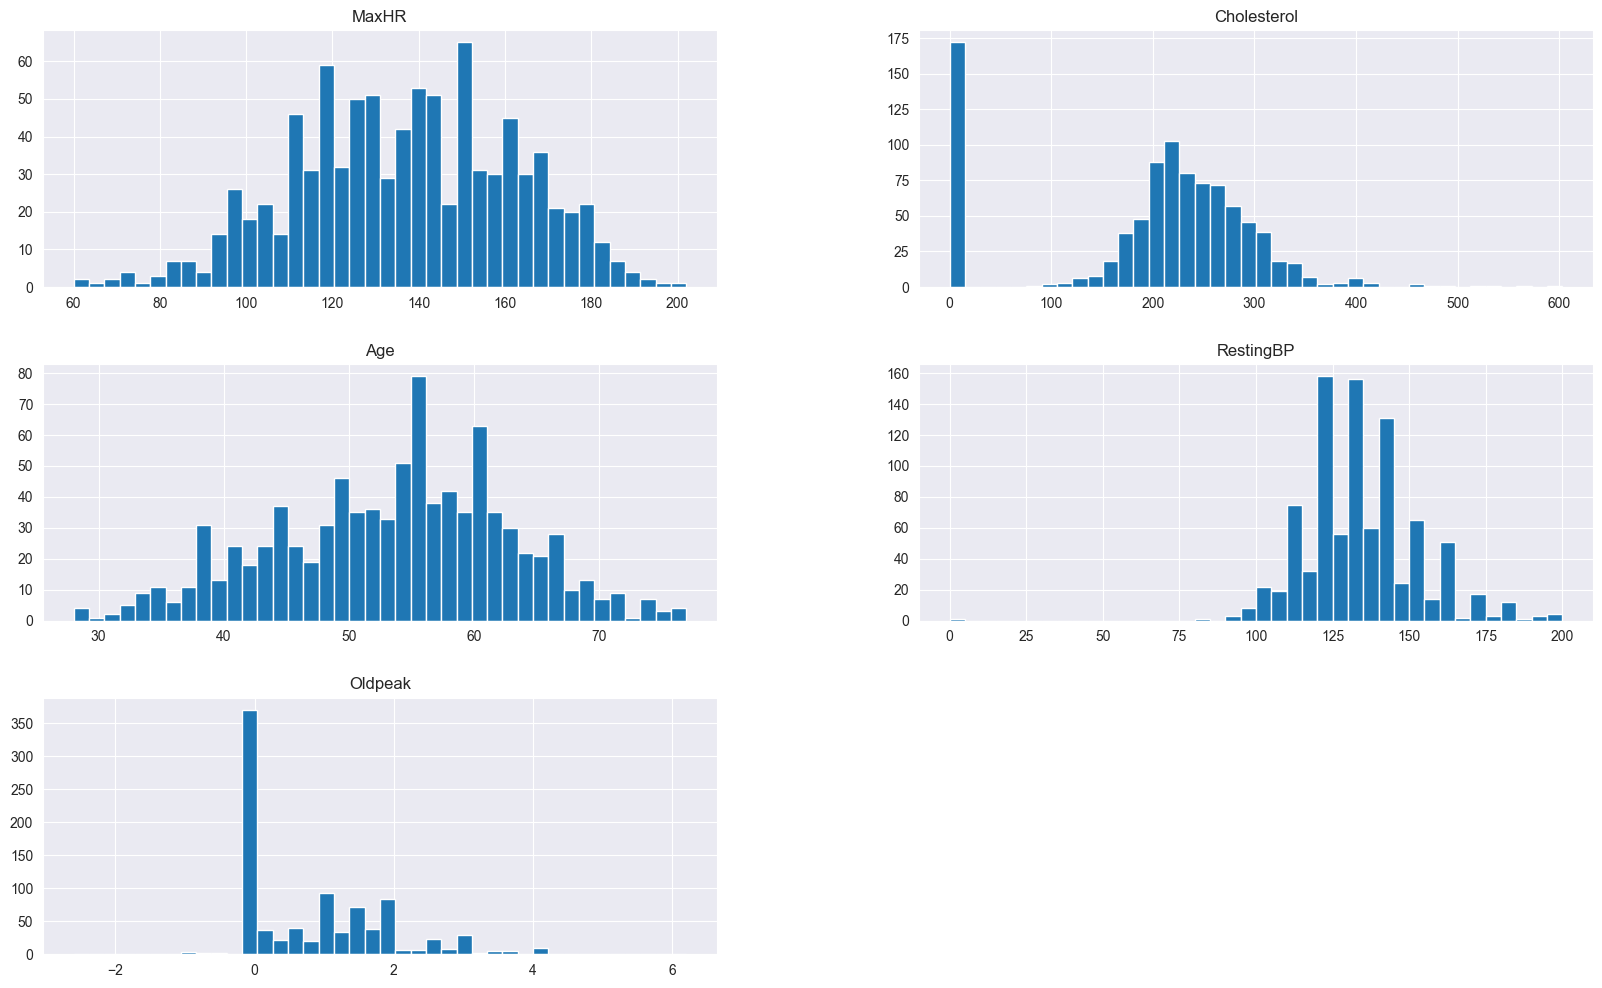

In [13]:
if "Oldpeak" not in attributes_high: 
    attributes_high.append("Oldpeak")
df_x = df[attributes_high]
df_x.hist(bins=40, figsize=(20, 12))
plt.show()

In conclusion, the pair plot offers valuable insights into the relationships between numerical attributes within the dataset:
* Age and MaxHR distributions resemble normal distributions, suggesting relatively uniform spreads of values across the dataset.
* However, OldPeak notably contains a disproportionately high count of zeros (350 instances), indicating potential data anomalies or missing values.
* RestingBP tends to cluster around the range of 125 to 140, indicating a common range for this attribute.
* Conversely, Cholesterol also displays a significant count of zeros, which may indicate missing data, warranting further investigation into data integrity. 

Next in line are seven bar plots meticulously crafted to unveil the distribution of categorical attributes. These visualizations shed light on the prevalence and distribution of key categories within attributes such as HeartDisease, sex, fastingbs, chest pain type, st slope, exercise angina, and resting ECG, providing valuable insights into the dataset's composition and characteristics.

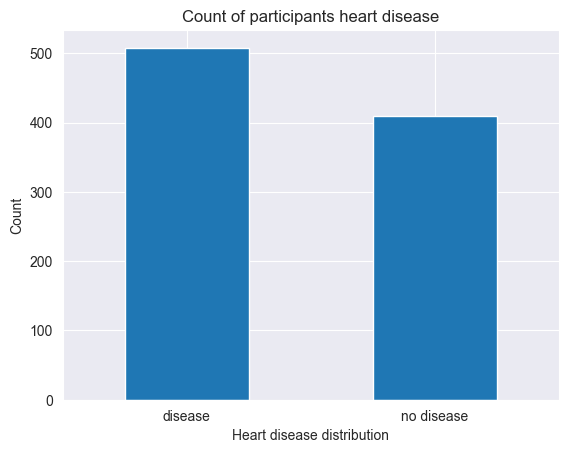

In [14]:
disease_mapping = {0: 'no disease', 1: 'disease'}

# Use the map function to replace values in the disease column
x = df['HeartDisease'].map(disease_mapping)

# Count the number of males and females
gender_counts = x.value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Count of participants heart disease')
plt.xlabel('Heart disease distribution')
plt.ylabel('Count')
plt.show()

The conclusion drawn from analyzing the distribution of heart disease within the dataset reveals a near 50/50 split between positive and negative cases.

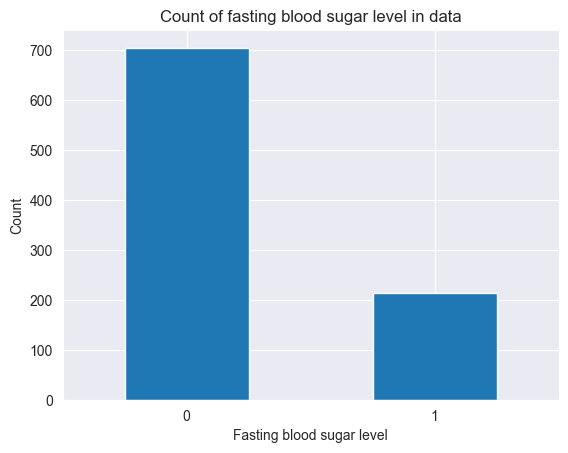

In [15]:
# Count the number of males and females
gender_counts = df['FastingBS'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Count of fasting blood sugar level in data')
plt.xlabel('Fasting blood sugar level')
plt.ylabel('Count')
plt.show()

In conclusion, within the dataset, the fasting blood sugar (fastingBS) attribute indicates a notable distribution, with approximately 200 instances featuring a value of 1 and around 700 instances displaying a value of 0. This observation suggests a significant imbalance in the distribution of fasting blood sugar levels among the sampled population, warranting further exploration into its potential implications for cardiovascular health and associated risk factors.

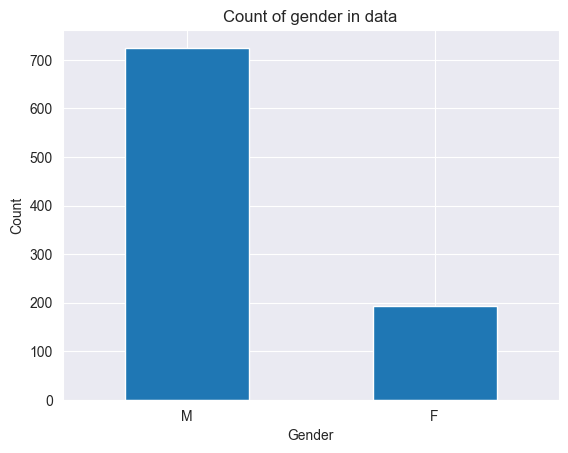

In [16]:
# Count the number of males and females
gender_counts = df['Sex'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Count of gender in data')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In conclusion, the dataset reveals a notable gender disparity, with approximately 720 male participants compared to 190 female participants. This observation aligns with known epidemiological trends, as men generally have a higher predisposition to heart disease compared to pre-menopausal women. 

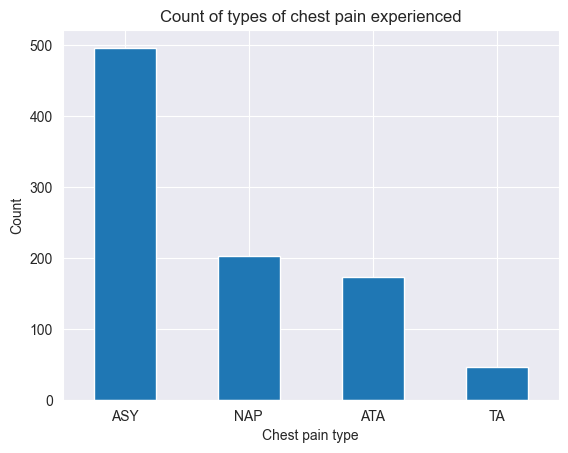

In [17]:
# Count the number of males and females
gender_counts = df['ChestPainType'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Count of types of chest pain experienced')
plt.xlabel('Chest pain type')
plt.ylabel('Count')
plt.show()

In conclusion, the analysis of chest pain types within the dataset reveals that the majority of cases, approximately, predominantly involve ASY, where no chest discomfort is reported. Additionally, the occurrences of NAP and ATA are relatively balanced, with around 200 instances each. However, TA, representing typical symptoms associated with heart diseases, is notably lower, comprising approximately 50 instances.

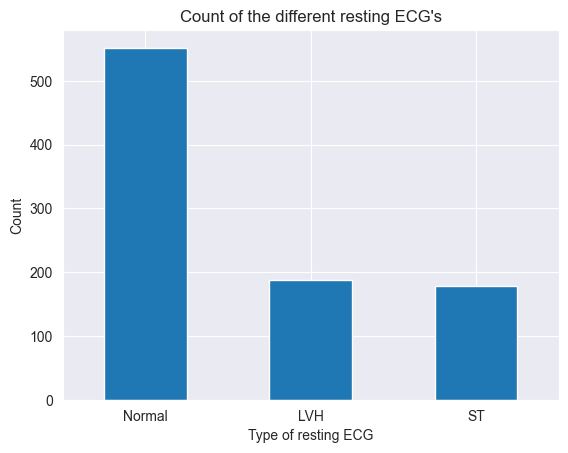

In [18]:
gender_counts = df['RestingECG'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Count of the different resting ECG's")
plt.xlabel('Type of resting ECG')
plt.ylabel('Count')
plt.show()


In conclusion, the distribution analysis of the resting electrocardiographic results indicates that the majority of cases, approximately 550 instances, exhibit a normal pattern. Conversely, both LVH (Left Ventricular Hypertrophy) and ST-T wave abnormality are relatively balanced, with occurrences ranging between 180 and 190 instances each.

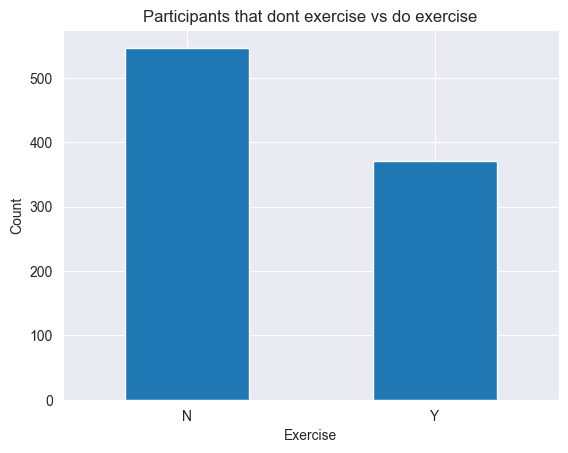

In [19]:
# Count the number of males and females
gender_counts = df['ExerciseAngina'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Participants that dont exercise vs do exercise')
plt.xlabel('Exercise')
plt.ylabel('Count')
plt.show()

In conclusion, the analysis of exercise angina within the dataset reveals that the majority of participants, approximately 550 individuals, do not engage in exercise, while around 380 individuals do exercise. 

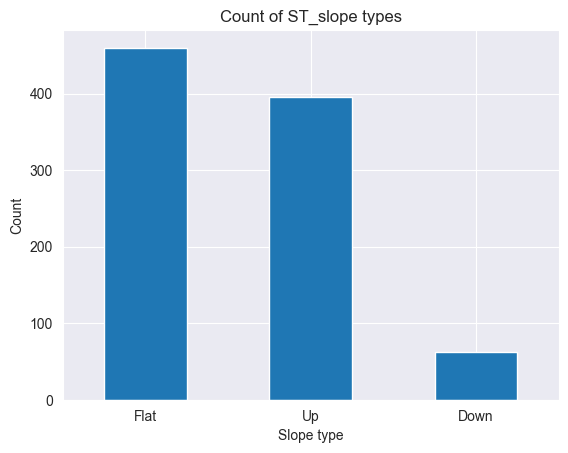

In [20]:
gender_counts = df['ST_Slope'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Count of ST_slope types')
plt.xlabel('Slope type')
plt.ylabel('Count')
plt.show()


In conclusion, upon analyzing the distribution of ST slope categories within the dataset, it is evident that the "flat" and "up" categories exhibit high frequencies, whereas occurrences of the "down" category are notably lower in comparison.

## EDA bivariaat

A pair plot to visualize the corralation between the numeral data

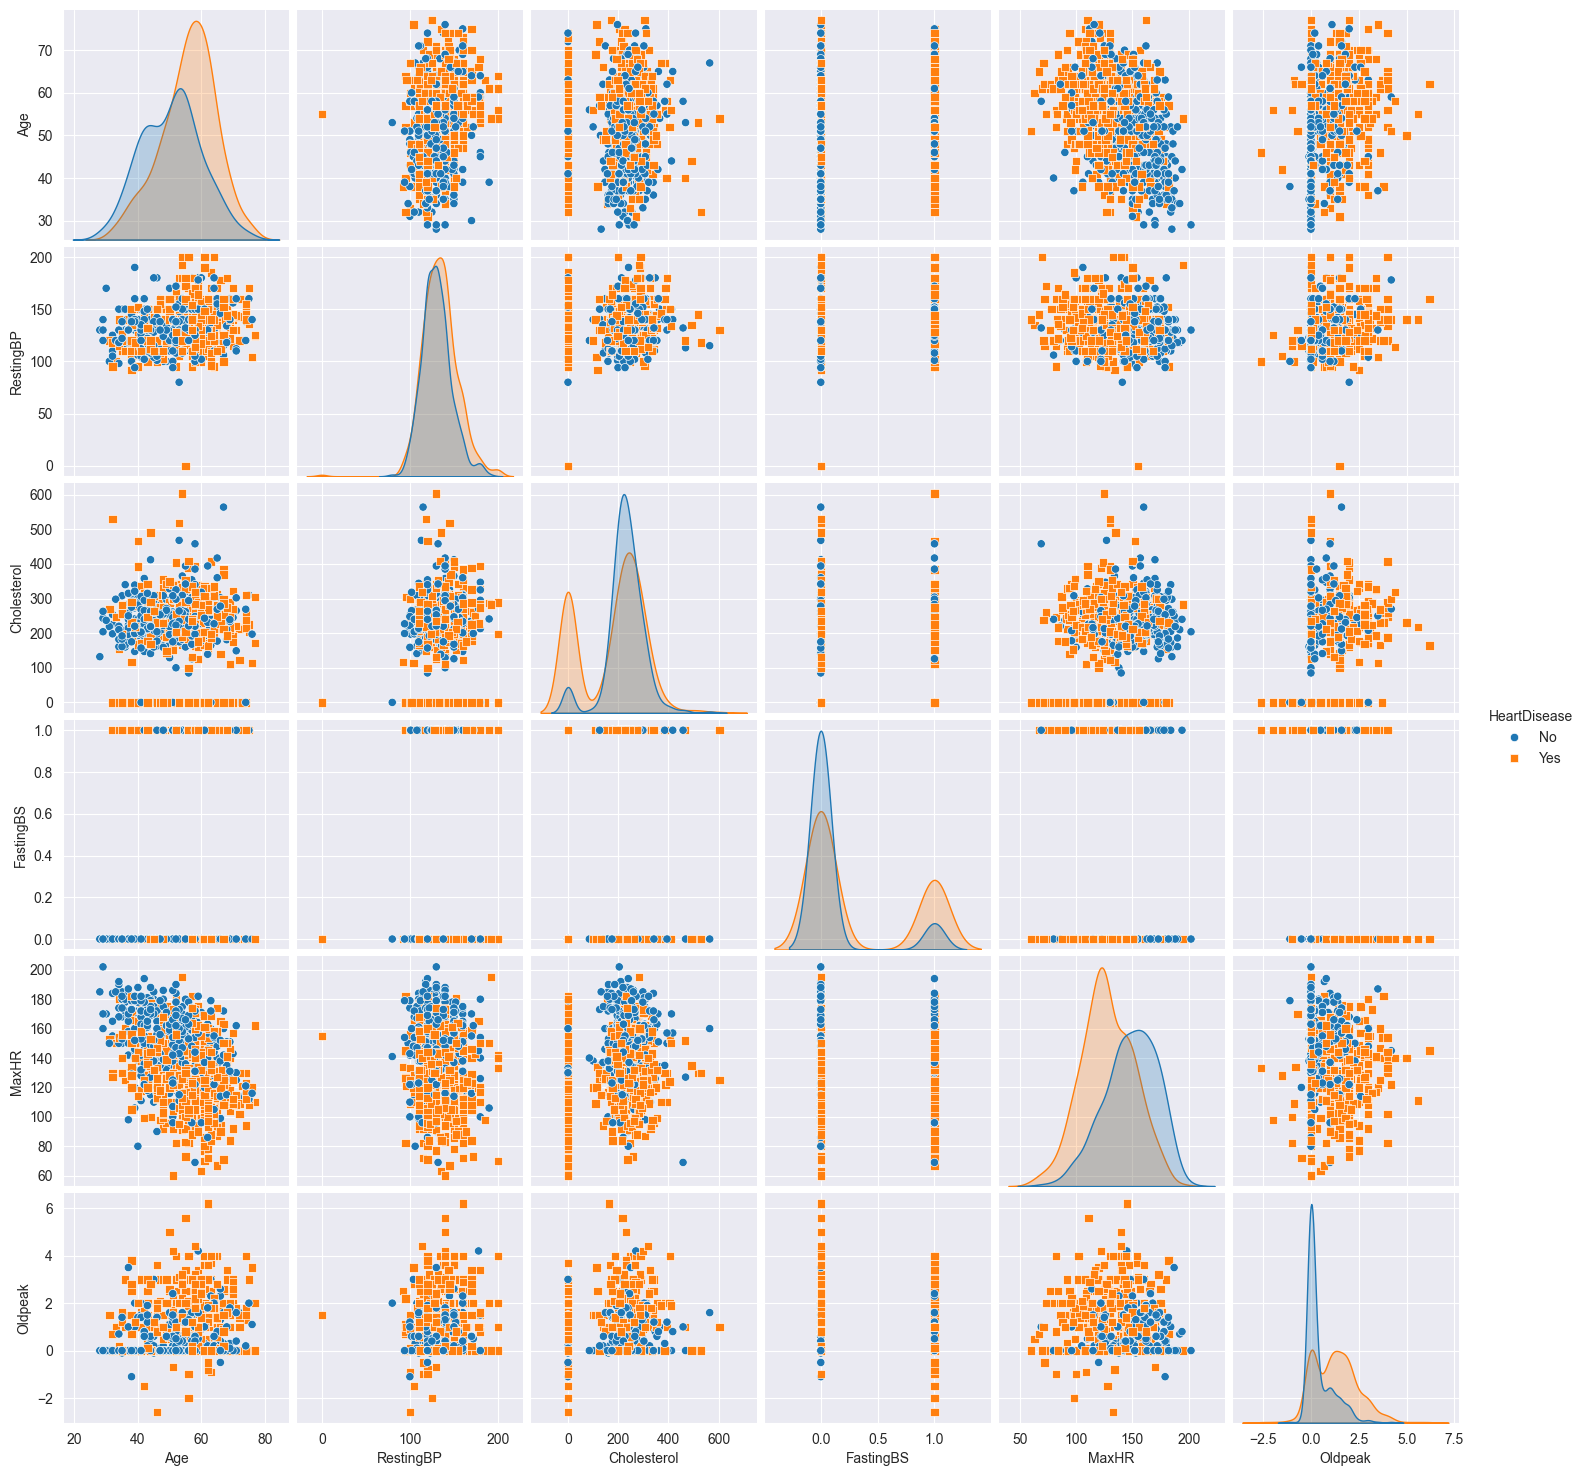

In [21]:
# heatmap
df_pair = df.copy()
disease = {0 : "No", 1 : "Yes"}
df_pair["HeartDisease"] = df_pair["HeartDisease"].map(disease)
sns.pairplot(df_pair, hue="HeartDisease", markers=["o", "s"])
plt.show()

Conclusion:
- The distributions of sns.pairplot that only contained the numerical attributes are quite similar for participants with and without a heart disease.

A heatmap is required to visualize relationships between nominal attributes. However, to utilize the heatmap function, these attributes must first be converted to numeric format. Only heart disease and fasting blood sugar (fastingBS) are currently represented as 0 or 1; the remaining attributes require conversion.

In [22]:
hm_df = df[["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope", "FastingBS", "HeartDisease"]].copy()
gender = {'M': 0, 'F': 1}#
hm_df['Sex'] = hm_df['Sex'].map(gender)

chest_pain = {'ATA': 0, 'ASY': 1, 'NAP': 2, 'TA': 3}
hm_df['ChestPainType'] = hm_df['ChestPainType'].map(chest_pain)

resting_ecg = {'Normal': 0, 'ST': 1, 'LVH': 2}
hm_df['RestingECG'] = hm_df['RestingECG'].map(resting_ecg)

exercise = {'N': 0, 'Y': 1}
hm_df['ExerciseAngina'] = hm_df['ExerciseAngina'].map(exercise)

slope = {'Down': 0, 'Flat': 1, 'Up': 2}
hm_df['ST_Slope'] = hm_df['ST_Slope'].map(slope)

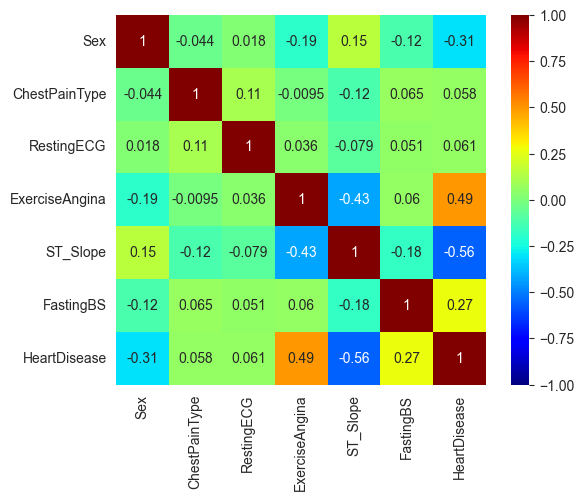

In [23]:
sns.heatmap(hm_df.corr(), annot=True, cmap="jet", vmin=-1.0, vmax=1.0, square=True)
plt.show()

In conclusion:
* The highest correlation coefficient of 0.49 indicates a moderate positive correlation between Heart Disease and Exercise Angina, suggesting a tendency for them to increase together.
* Conversely, the lowest correlation coefficient of -0.53 indicates a moderate negative correlation between Heart Disease and ST Slope, implying an inverse relationship. A similar negative correlation (-0.43) is observed between Exercise Angina and ST Slope.
* Additionally, correlation coefficients ranging between -0.31 and 0.27 suggest weak to mild correlations between corresponding variables.

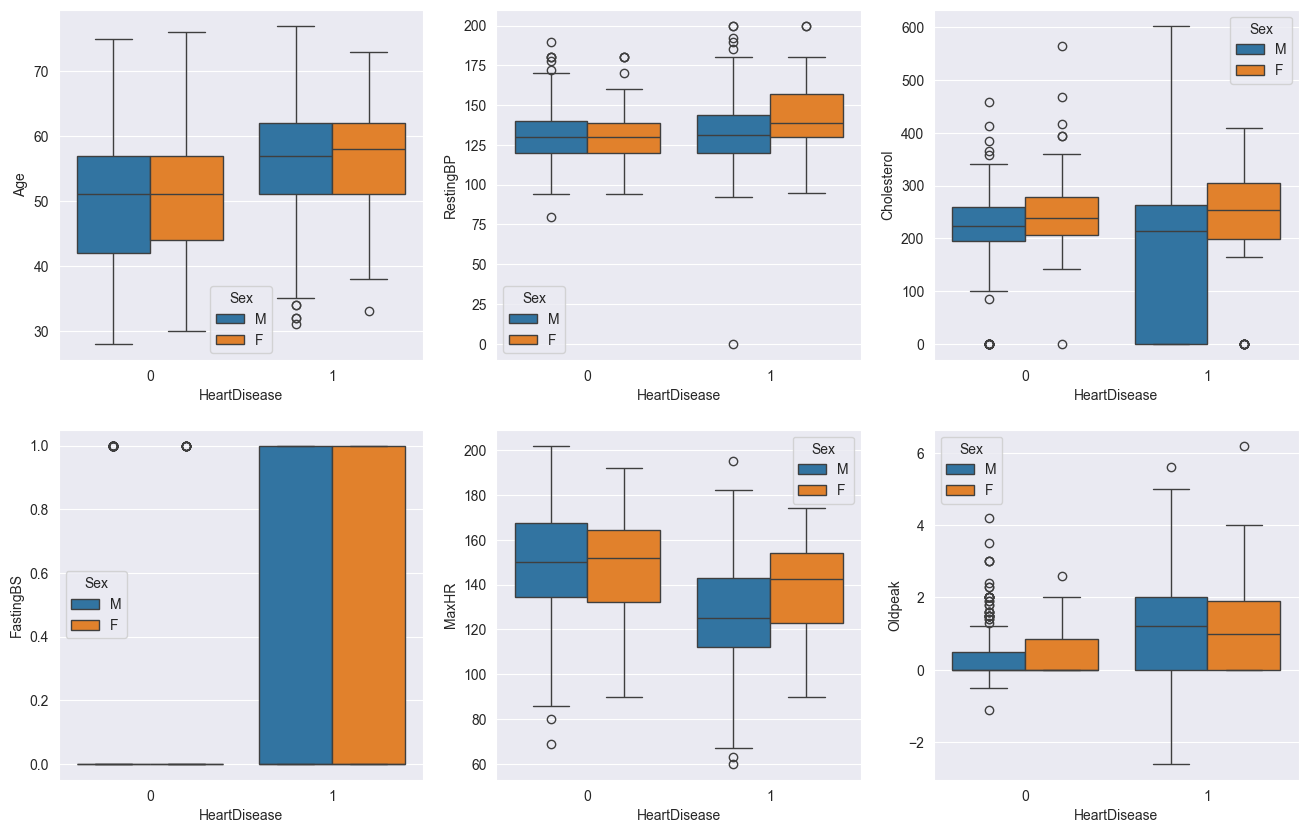

In [24]:
# here will be code for a boxplot
fig = plt.figure(figsize=(16.0, 10.0))
for index, attribute in enumerate(('Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak')):
    axs = fig.add_subplot(2, 3, index+1)
    sns.boxplot(df, x="HeartDisease", y=attribute, hue="Sex", ax=axs)
plt.show()

Conclusion:
- Higher age appears to correlate with an increased likelihood of having or developing heart disease, irrespective of gender.
- Resting blood pressure (RestingBP) shows relatively consistent values between individuals with and without heart disease, except for women with heart disease, whose values tend to be higher. Men with heart disease exhibit RestingBP levels similar to those without, while women demonstrate a slight elevation (approximately 10 units).
- The prevalence of zero values in cholesterol obscures potential gender and heart disease associations; however, without these zeros, cholesterol levels may show comparable patterns between genders and heart disease statuses.
- Individuals with heart disease tend to have lower maximum heart rates (MaxHR) compared to those without.
- Notably, there is a significant difference in Oldpeak values between individuals with heart disease and those without, indicating a potential diagnostic value for this attribute in distinguishing between the two groups.

In the following analysis, we delve into the relationship between heart disease and various attributes within our dataset. Through a series of barplots, we aim to uncover the association between heart disease status and several key factors, shedding light on potential risk factors and patterns. The attributes under examination encompass chest pain type, gender (sex), oldpeak values exceeding 3.7 (identified as outliers), fasting blood pressure (fastingBP) equal to 1 (identified as outliers in a boxplot), resting blood pressure (resting BP) at or above 170 (often associated with heart disease), maximum heart rate (maxHR) at or below 70 (typically linked to heart disease), and age categorized before and after 51 years (relevant due to menopause onset in women). Each barplot offers insights into how these factors may influence the likelihood of heart disease occurrence, facilitating a deeper understanding of the dataset's intricacies.

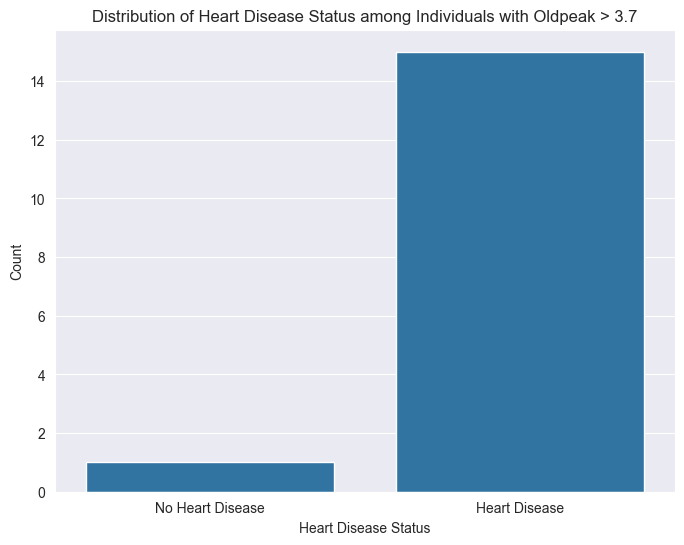

In [25]:
# Filter the DataFrame for Oldpeak values higher than 3.7
filtered_df = df[df['Oldpeak'] >= 3.7]

# Create a barplot
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=filtered_df)
plt.title('Distribution of Heart Disease Status among Individuals with Oldpeak > 3.7')
plt.xlabel('Heart Disease Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.show()


In conclusion, the analysis of individuals with an oldpeak value exceeding 3.7 reveals a noteworthy trend. Among these participants, only one individual is without heart disease, while fifteen individuals exhibit the presence of heart disease. This significant disparity suggests that an oldpeak value greater than 3.7 may serve as a strong indicator for the detection of heart disease. Such findings underscore the potential utility of oldpeak values as an important diagnostic factor, aiding in the identification and management of cardiovascular conditions.

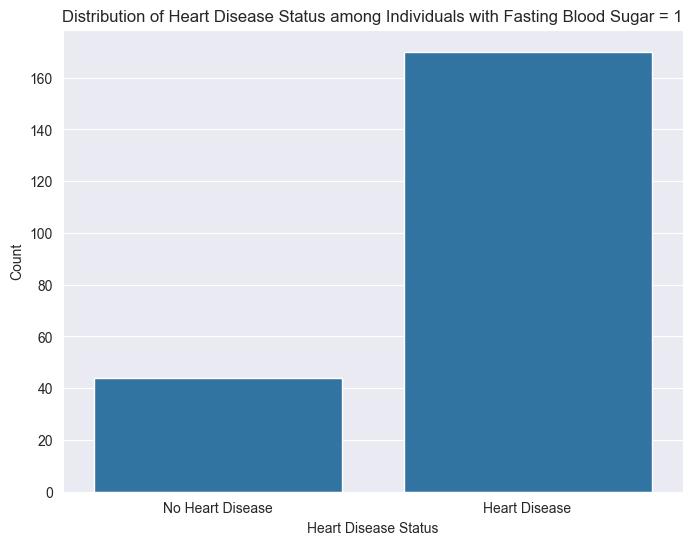

In [26]:
# Filter the DataFrame for fasting blood pressure value 1
filtered_df = df[df['FastingBS'] == 1]

# Create a barplot
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=filtered_df)
plt.title('Distribution of Heart Disease Status among Individuals with Fasting Blood Sugar = 1')
plt.xlabel('Heart Disease Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.show()


In the distribution analysis of heart disease status among individuals with fasting blood sugar equal to 1, the data reveals that approximately 45 individuals show no signs of heart disease, while around 170 individuals exhibit the presence of heart disease. This notable discrepancy underscores the potential association between elevated fasting blood sugar levels and an increased risk of heart disease.

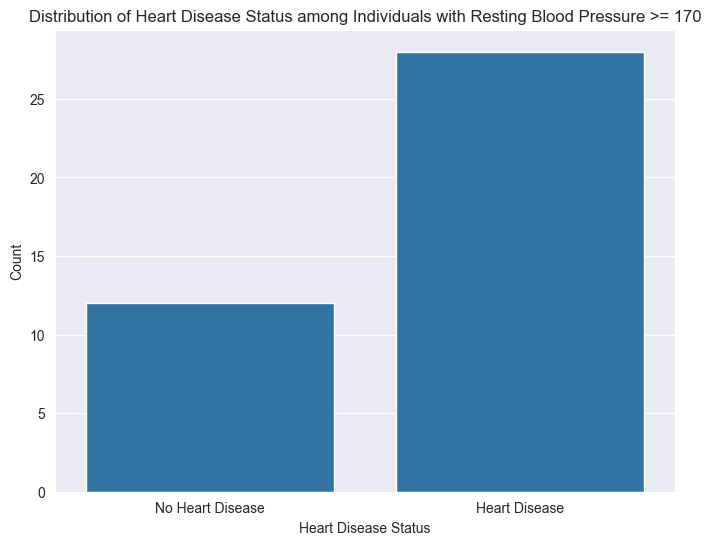

In [27]:
# Filter the DataFrame for resting blood pressure values greater than or equal to 170
filtered_df = df[df['RestingBP'] >= 170]

# Create a barplot
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=filtered_df)
plt.title('Distribution of Heart Disease Status among Individuals with Resting Blood Pressure >= 170')
plt.xlabel('Heart Disease Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.show()

In the distribution analysis of heart disease status among individuals with resting blood pressure equal to or above 170, the data reveals that 12 individuals show no signs of heart disease, while 28 individuals exhibit the presence of heart disease. This disparity suggests a potential association between elevated resting blood pressure levels and an increased risk of heart disease. 

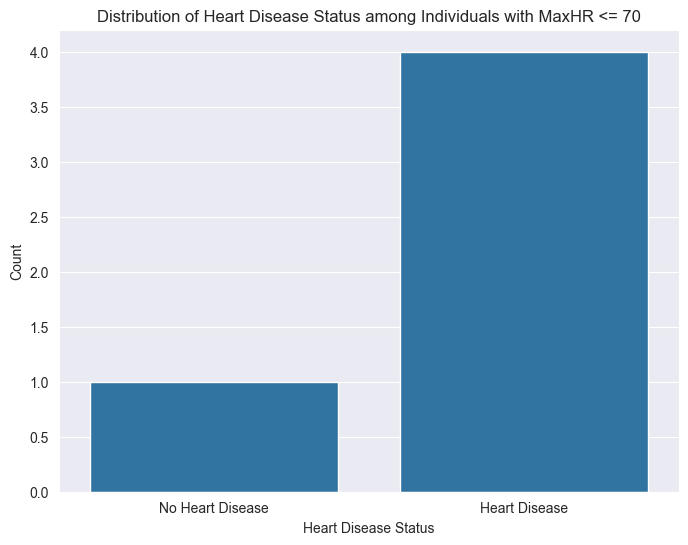

In [28]:
# Filter the DataFrame for maximum heart rate values less than or equal to 70 because i found that below 70 is most of the time considered for a cardiovascular disease
filtered_df = df[df['MaxHR'] <= 70]

# Create a barplot
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=filtered_df)
plt.title('Distribution of Heart Disease Status among Individuals with MaxHR <= 70')
plt.xlabel('Heart Disease Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.show()

In the distribution analysis of heart disease status among individuals with a maximum heart rate (MaxHR) equal to or below 70, the data indicates that only one individual shows no signs of heart disease, while three individuals exhibit the presence of heart disease.

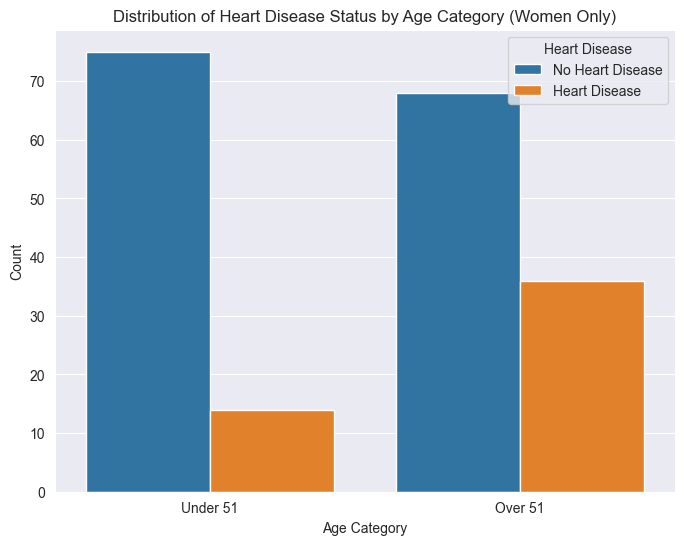

In [29]:
# Filter the DataFrame for female participants
female_df = df[df['Sex'] == 'F'].copy()

# Categorize age as under 51 and over 51
female_df.loc[:, 'AgeCategory'] = pd.cut(female_df['Age'], bins=[0, 51, float('inf')], labels=['Under 51', 'Over 51'])

# Create a barplot
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeCategory', hue='HeartDisease', data=female_df)
plt.title('Distribution of Heart Disease Status by Age Category (Women Only)')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

In the distribution analysis of heart disease status among women categorized by age, the data indicates that among women aged over 51, 36 individuals exhibit the presence of heart disease. Conversely, among women aged under 51, 12 individuals show signs of heart disease. These findings suggest a potential association between age and the prevalence of heart disease among women, with older women showing a higher likelihood of heart disease. This observed trend aligns with the notion that menopause, occurring around this age range, may contribute to the increased risk of heart disease among older women.

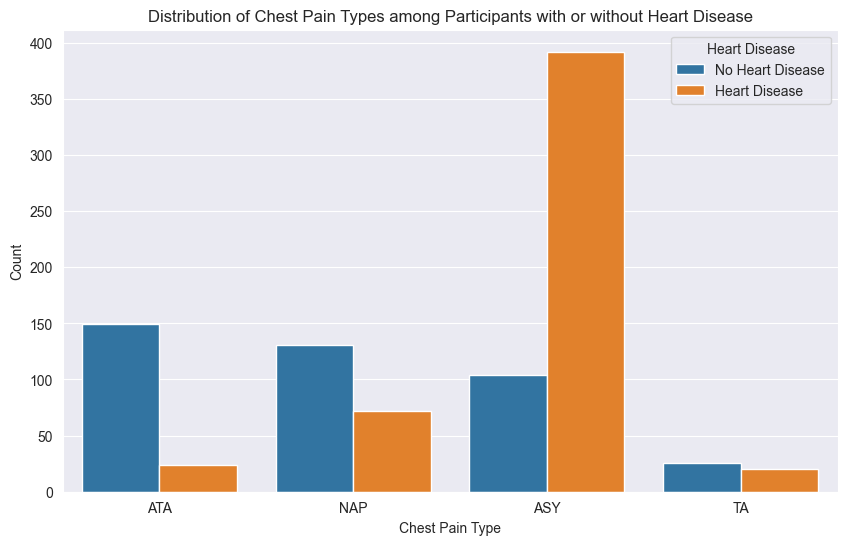

In [30]:
heart_disease_df = df[df['Sex'].isin(['M', 'F'])]

# Create a barplot
plt.figure(figsize=(10, 6))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=heart_disease_df)
plt.title('Distribution of Chest Pain Types among Participants with or without Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

The observed trend supports the idea that menopause, typically occurring around this age range, might play a role in elevating the risk of heart disease among older women.
* ASY appears to be prevalent among individuals with heart disease, with approximately 390 instances, compared to around 110 instances without heart disease.
* ATA shows a distribution of about 150 instances without heart disease and 25 instances with heart disease.
* NAP is associated with approximately 140 instances without heart disease and 75 instances with heart disease.
* TA is less common, with roughly 30 instances without heart disease and 20 instances with heart disease. 

These findings highlight ASY as a prevalent symptom among individuals with heart disease and suggest varying patterns among different types of chest pain in relation to heart disease occurrence.

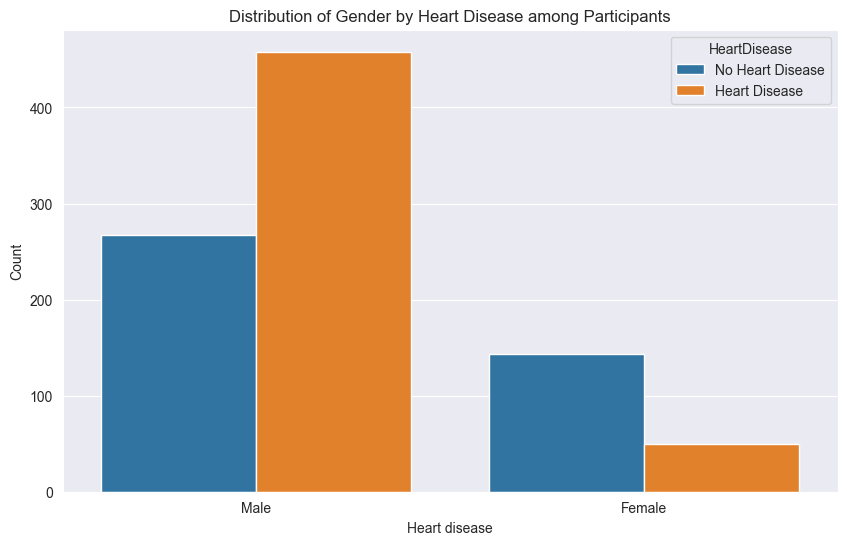

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.title('Distribution of Gender by Heart Disease among Participants')
plt.xlabel('Heart disease')
plt.ylabel('Count')
plt.xticks(ticks=['M', 'F'], labels=['Male', 'Female'])
plt.legend(title='HeartDisease', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

In the distribution analysis of gender by heart disease among participants, the data reveals:
- A significant proportion of male participants, with 470 individuals diagnosed with heart disease and 280 individuals showing no signs of the disease.
- Among female participants, 140 individuals exhibit no signs of heart disease, while 50 individuals are diagnosed with the disease.

These findings underscore a higher prevalence of heart disease among male participants compared to females.

In the following data preprocessing step, we aim to improve the integrity of our dataset by removing rows containing infeasible values. Specifically, we will eliminate rows with a resting blood pressure (RestingBP) value of 0, as well as rows with a cholesterol value of 0. This process ensures that our data remains accurate and suitable for analysis, free from unrealistic entries that may skew results.

In [32]:
# Deleting rows with 0 restingBP
df = df[df['RestingBP'] != 0]

# Deleting rows with 0 cholesterol
df = df[df['Cholesterol'] != 0]

# Machine learning



In [33]:
hm_df = df.copy()

gender = {'M': 0, 'F': 1}#
hm_df['Sex'] = hm_df['Sex'].map(gender)

chest_pain = {'ATA': 0, 'ASY': 1, 'NAP': 2, 'TA': 3}
hm_df['ChestPainType'] = hm_df['ChestPainType'].map(chest_pain)

resting_ecg = {'Normal': 0, 'ST': 1, 'LVH': 2}
hm_df['RestingECG'] = hm_df['RestingECG'].map(resting_ecg)

exercise = {'N': 0, 'Y': 1}
hm_df['ExerciseAngina'] = hm_df['ExerciseAngina'].map(exercise)

slope = {'Down': 0, 'Flat': 1, 'Up': 2}
hm_df['ST_Slope'] = hm_df['ST_Slope'].map(slope)

hd = {0: 'No', 1: 'Yes'}
hm_df['HeartDisease'] = hm_df["HeartDisease"].map(hd)
hm_df['HeartDisease'] = pd.Categorical(hm_df['HeartDisease'])


In [34]:
hm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             746 non-null    int64   
 1   Sex             746 non-null    int64   
 2   ChestPainType   746 non-null    int64   
 3   RestingBP       746 non-null    int64   
 4   Cholesterol     746 non-null    int64   
 5   FastingBS       746 non-null    int64   
 6   RestingECG      746 non-null    int64   
 7   MaxHR           746 non-null    int64   
 8   ExerciseAngina  746 non-null    int64   
 9   Oldpeak         746 non-null    float64 
 10  ST_Slope        746 non-null    int64   
 11  HeartDisease    746 non-null    category
dtypes: category(1), float64(1), int64(10)
memory usage: 70.8 KB


In [35]:
X = hm_df.drop("HeartDisease", axis=1)
y = hm_df["HeartDisease"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
# models i want to use
models = [
    DummyClassifier,
    DecisionTreeClassifier,
    GaussianNB,
    KNeighborsClassifier,
    RandomForestClassifier,
    LinearDiscriminantAnalysis,
    BaggingClassifier, 
    GradientBoostingClassifier
]

In [38]:
# loop through models and train
# cross-validation
metric_scores = {}
for model in models:
    scores = cross_validate(model(), X_train, y_train, cv=2, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    metric_scores[f"{model.__name__}"] = scores
    
pd.DataFrame(metric_scores).T

,fit_time,score_time,test_score,train_score
DummyClassifier,0.005009,0.006480,0.534483,0.534483
DecisionTreeClassifier,0.024940,0.024486,0.722222,1.000000
GaussianNB,0.013955,0.011473,0.821839,0.842912
KNeighborsClassifier,0.024933,0.213261,0.655172,0.743295
RandomForestClassifier,0.983170,0.050865,0.846743,1.000000
LinearDiscriminantAnalysis,0.039894,0.007979,0.821839,0.844828
BaggingClassifier,0.155584,0.028924,0.810345,0.992337
GradientBoostingClassifier,0.668098,0.021941,0.833333,0.992337


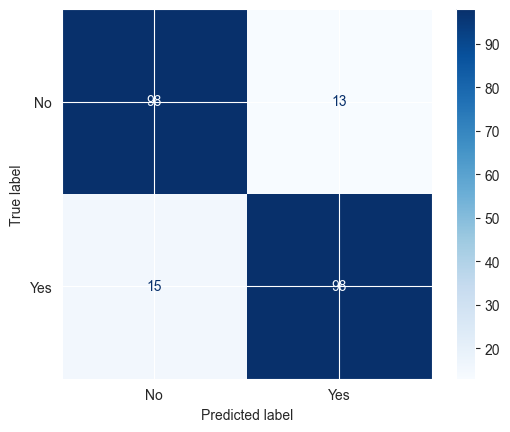

In [71]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Fit the classifier and predict
fitted = GaussianNB().fit(X_train, y_train)
y_pred = fitted.predict(X_test)

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Display confusion matrix plot
conf_matrix = ConfusionMatrixDisplay(conf_mat, display_labels=hm_df["HeartDisease"].cat.categories).plot(cmap=plt.cm.Blues)
plt.show()

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(X_train, y_train)
y_prob = model.predict_proba(X_test)

scores = {"label": [], "AUC": []}
plt.figure(figsize=(6.4, 6.4))
plt.plot([0, 1], [0, 1], ":k")

# Check if each class has at least one positive sample in y_test
classes_present = set(y_train)
for index, label in enumerate(hm_df["HeartDisease"].cat.categories):
    if label in classes_present:
        if sum(y_test == index) > 0:  # Check if there are positive samples for this class
            fpr, tpr, _ = roc_curve(y_test == index, y_prob[:, index])
            scores["label"].append(label)
            scores["AUC"].append(roc_auc_score(y_test == index, y_prob[:, index]))
            plt.plot(fpr, tpr, label=label)

if len(scores["label"]) > 0:  # Check if there are any classes with positive samples
    plt.axis("square")
    plt.grid(True)
    plt.title("ROC-curve")
    plt.legend()
    plt.show()
else:
    print("No positive samples found in the test set for any class.")


No positive samples found in the test set for any class.


In [ ]:
y_prob_1 = model.predict_proba(X_test)
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, y_prob_1)
plt.show()